In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip drive/My\ Drive/Copy\ of\ data.zip

Archive:  drive/My Drive/Copy of data.zip
replace Testing/Early_Blight/Early_Blight_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

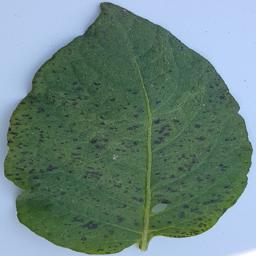

In [3]:
img = tf.keras.preprocessing.image.load_img('Training/Early_Blight/Early_Blight_3.jpg')
img

In [4]:
train = []

for i in range(1303):
    train.append('Early_Blight')

for i in range(816):
    train.append('Healthy')

for i in range(1132):
    train.append('Late_Blight')

train = np.array(train)
train.shape


(3251,)

In [5]:
train_image = []
for i in range(1, 1304):
    img = tf.keras.preprocessing.image.load_img(f'Training/{train[i-1]}/{train[i-1]}_{i}.jpg', target_size=(256,256,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    train_image.append(img)

for i in range(1, 817):
    img = tf.keras.preprocessing.image.load_img(f'Training/{train[i+1302]}/{train[i+1302]}_{i}.jpg', target_size=(256,256,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    train_image.append(img)

for i in range(1, 1133):
    img = tf.keras.preprocessing.image.load_img(f'Training/{train[i+2118]}/{train[i+2118]}_{i}.jpg', target_size=(256,256,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    train_image.append(img)


X_train = np.array(train_image)

In [6]:
X_train.shape

(3251, 256, 256, 3)

In [7]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
y_train = pd.DataFrame(train)
y_train.columns = ['Type']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(y_train[['Type']])
y_train_transformed = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Type']))
y_train_transformed

,Type_Early_Blight,Type_Healthy,Type_Late_Blight
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
3246,0.0,0.0,1.0
3247,0.0,0.0,1.0
3248,0.0,0.0,1.0
3249,0.0,0.0,1.0


In [10]:
model.fit(X_train, y_train_transformed, epochs=10, batch_size=32)

Epoch 1/10
102/102 [==============================] - 15s 93ms/step - loss: 1.2270 - accuracy: 0.4316
Epoch 2/10
102/102 [==============================] - 8s 75ms/step - loss: 0.9307 - accuracy: 0.5749
Epoch 3/10
102/102 [==============================] - 8s 79ms/step - loss: 0.7909 - accuracy: 0.6595
Epoch 4/10
102/102 [==============================] - 8s 77ms/step - loss: 0.5794 - accuracy: 0.7761
Epoch 5/10
102/102 [==============================] - 8s 77ms/step - loss: 0.4607 - accuracy: 0.8241
Epoch 6/10
102/102 [==============================] - 8s 77ms/step - loss: 0.3244 - accuracy: 0.8834
Epoch 7/10
102/102 [==============================] - 8s 76ms/step - loss: 0.2794 - accuracy: 0.9013
Epoch 8/10
102/102 [==============================] - 8s 77ms/step - loss: 0.2027 - accuracy: 0.9286
Epoch 9/10
102/102 [==============================] - 8s 76ms/step - loss: 0.1840 - accuracy: 0.9354
Epoch 10/10
102/102 [==============================] - 8s 76ms/step - loss: 0.1405 - accur

In [12]:
test = []

for i in range(162):
    test.append('Early_Blight')

for i in range(102):
    test.append('Healthy')

for i in range(141):
    test.append('Late_Blight')

test = np.array(test)
test.shape

(405,)

In [16]:
test_image = []
for i in range(1, 163):
    img = tf.keras.preprocessing.image.load_img(f'Testing/{test[i-1]}/{test[i-1]}_{i}.jpg', target_size=(256,256,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    test_image.append(img)

for i in range(1, 103):
    img = tf.keras.preprocessing.image.load_img(f'Testing/{test[i+161]}/{test[i+161]}_{i}.jpg', target_size=(256,256,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    test_image.append(img)

for i in range(1, 142):
    img = tf.keras.preprocessing.image.load_img(f'Testing/{test[i+263]}/{test[i+263]}_{i}.jpg', target_size=(256,256,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    test_image.append(img)


X_test = np.array(test_image)

In [17]:
X_test.shape

(405, 256, 256, 3)

In [18]:
y_test = pd.DataFrame(test)
y_test.columns = ['Type']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(y_test[['Type']])
y_test_transformed = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Type']))
y_test_transformed

,Type_Early_Blight,Type_Healthy,Type_Late_Blight
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
400,0.0,0.0,1.0
401,0.0,0.0,1.0
402,0.0,0.0,1.0
403,0.0,0.0,1.0


In [19]:
model.evaluate(X_test, y_test_transformed)

13/13 [==============================] - 1s 72ms/step - loss: 0.6015 - accuracy: 0.8272


[0.6015216708183289, 0.8271604776382446]

In [38]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Type']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(y_pred[['Type']])
y_pred_transformed = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Type']))
y_pred_transformed

13/13 [==============================] - 0s 27ms/step


,Type_0,Type_1,Type_2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
400,0.0,0.0,1.0
401,1.0,0.0,0.0
402,0.0,0.0,1.0
403,0.0,0.0,1.0


In [42]:
f1_score(y_test_transformed, y_pred_transformed, average='weighted')

0.8273450812399736